# K - Means Algorithm for Image Compression

## Overview
### Author: Muhammad Taimoor Zaeem, National University of Sciences and Technology, Islamabad
K - Means algorithm is one of the most popular Unsupervised Machine Learning Classification algorithms. In this code, I implemented K - means algorithm and used it for image compression. 

In this code, I used the following python packages/libraries.

In [18]:
from matplotlib import pyplot as plt
import numpy as np
import cv2 as cv

### Randomly Initialize Centroids
This function initializes the centroids to random Data Points (Pixels in this case).

In [19]:
def kmean_init_centroids(X, K):
    centroids = np.zeros((K, np.size(X, 1)))
    random_indexes = np.random.permutation(range(np.size(X, 0)))
    centroids = X[random_indexes[1:K], :]
    return centroids

### Find Closest Centroid
This function finds the closest centroid from our data (pixels in this case).

In [20]:
def find_closest_centroids(X, centroids):
    K = np.size(centroids, 0)
    m = np.size(X, 0)
    indexes = np.zeros([m, 1])
    
    for i in range(m):
        distances = np.zeros([1, K])
        for j in range(K):
            distances[0, j] = np.sqrt(np.sum(np.power((X[i, :] - centroids[j, :]), 2)))
        min_index = list(distances[0]).index(np.amin(distances))
        indexes[i] = min_index
    return indexes

### Calculate New Position of Centroids
This function calculates the mean of the data points belonging to a centroid and sets the centroid to the new location.

In [21]:
def compute_centroids(X, indexes, K):
    centroids = np.zeros((K, np.size(X, 1)))
    for i in range(K):
        X_rows = (indexes == i).astype(int)  # Converts and array of true/false to 0s and 1s
        X_rows = X_rows.nonzero() # Select indices of 1s in the array
        X_rows = list(X_rows[0]) # Convert to list from numpy array
        centroids[i, :] = np.mean(X[X_rows, :], axis=0)
    return centroids

### Run K - Means Algorithm
This function runs the K means algorithm for a number of iterations. It repeatedly performs the cluster assignment step and the move centroid step.

In [22]:
def run_kmeans(X, init_centroids, max_iters):
    K = np.size(init_centroids, 0)
    m, n = [np.size(X, 0), np.size(X, 1)]
    centroids = init_centroids
    indexes = np.zeros((m, 1))
    
    for i in range(max_iters):
        print('K-Means iteration ', i+1, '/', max_iters)
        indexes = find_closest_centroids(X, centroids)
        centroids = compute_centroids(X, indexes, K)
    return [centroids, indexes]

## Main Program
Now we use our implementation of K - means algorithm for image compression.

In [25]:
# Read Pixel values from the image
A = cv.imread('bird_big.png')
# A = A.astype(float)
# Dividing the values by 255 so our values are in the range 0 - 1
A = A / 255
# Reshaping the matrix into rows and columns
X = np.reshape(A, (np.size(A, 0) * np.size(A, 1), 3))

# The number of Clusters / Colours
K = 20
# Number of times to run K - means
max_iters = 10

# Randomly initailize the centroids
init_centroids = kmean_init_centroids(X, K)

# Run K - means and get the centroids index and locations
centroids, indexes = run_kmeans(X, init_centroids, max_iters)

# Recovering the compresses image
X_recovered = centroids[indexes.astype(int), :]
X_recovered = np.reshape(X_recovered, (np.size(A, 0), np.size(A, 1), 3))


K-Means iteration  1 / 10
K-Means iteration  2 / 10
K-Means iteration  3 / 10
K-Means iteration  4 / 10
K-Means iteration  5 / 10
K-Means iteration  6 / 10
K-Means iteration  7 / 10
K-Means iteration  8 / 10
K-Means iteration  9 / 10
K-Means iteration  10 / 10


### Plotting the Images

Text(0.5, 0, '128x128')

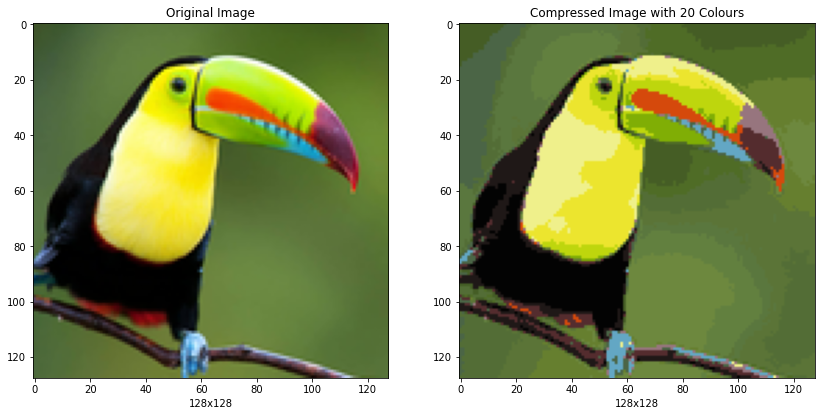

In [26]:
# Changing Red and Blue matrix values to convert from BGR to RGB
New_Image = X_recovered.copy()
New_Image[:, :, 0] = X_recovered[:, :, 2]
New_Image[:, :, 2] = X_recovered[:, :, 0]

Old_Image = A.copy()
Old_Image[:, :, 0] = A[:, :, 2]
Old_Image[:, :, 2] = A[:, :, 0]

# Plotting the images
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 14))
ax1.imshow(Old_Image)
ax1.set_title('Original Image')
ax1.set_xlabel(str(np.size(Old_Image, 0))+'x'+str(np.size(Old_Image, 1)))
ax2.imshow(New_Image)
ax2.set_title('Compressed Image with '+str(K)+' Colours')
ax2.set_xlabel(str(np.size(New_Image, 0))+'x'+str(np.size(New_Image, 1)))